# Market Basket Analysis

Apriori is a popular algorithm for extracting frequent itemsets with applications in association rule learning. There are various packages that offer apriori algorithm. I choose mlxtend package's Apriori for this analysis.

![title](https://miro.medium.com/max/5760/1*DHfQvlMVBaJCHpYmj1kmCw.png)

### Measures of Effectiveness of the Rule

The measures of effectiveness of the rule are as Follows:
* Support
* Confidence
* Lift
* Others: Affinity, Leverage

For this Assignment, We need to consider the following:

   **Use this file to extract association rules with minimum support = 0.01 and confidence= 0.5**

Importing Libraries

In [151]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
print('Libraries Imported')

Libraries Imported


In [152]:
#Import Data:
df = pd.read_csv("groceries_v2.csv",header=None, sep='\n')

# Split to columns from comma seperation values:
df = df[0].str.split(',', expand=True)

#Change Column type to String:
df.columns = df.columns.astype(str)

In [153]:
#Replacing None with 0 
df.replace(to_replace=[None], value=0, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tropical fruit,yogurt,coffee,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,whole milk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pip fruit,yogurt,cream cheese,meat spreads,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,other vegetables,whole milk,condensed milk,long life bakery product,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can see, A Dataframe with a total of 32 columns has been created. For Further Analysis, We need to change dataframe to lists. This helps Aprori algorithm to analysis by creating better search space.

In [154]:
num_records = len(df)
# Changing Dataframe type from pandas dataframe to List:
records = []
for i in range(0,num_records):
    records.append([str(df.values[i,j]) for j in range(0, 32)])
print('Dataframe converted to lists type')

Dataframe converted to lists type


## Data Preprocessing

To make use of the apriori module given by mlxtend library, we need to convert the dataset according to it’s liking. apriori module requires a dataframe that has either 0 and 1 or True and False as data. The data we have is all string (name of items), we need to **One-Hot Encode** the data.

In [156]:
items = (df['0'].unique())
encoded_vals = []
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
OHE_df = pd.DataFrame(encoded_vals)

## Applying Apriori

apriori module from mlxtend library provides fast and efficient apriori implementation.

In [157]:
#Passing the arguments to apriori function
freq_items = apriori(OHE_df, min_support=0.01, use_colnames=True, verbose=1)
freq_items.head(10)

Processing 348 combinations | Sampling itemset size 43


,support,itemsets
0,0.017389,(flour)
1,0.029896,(candy)
2,0.011389,(cling film/bags)
3,0.019016,(white wine)
4,0.109010,(root vegetables)
5,0.025015,(ice cream)
6,0.033252,(berries)
7,0.022371,(grapes)
8,0.053285,(curd)
9,0.071690,(whipped/sour cream)


### Mining Association Rules

Frequent if-then associations called association rules which consists of an antecedent (if) and a consequent (then).

In [158]:
# Our desired threshold is 50%
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(yogurt, root vegetables)",(whole milk),0.025829,0.255542,0.014541,0.562992,2.203130,0.007941,1.703535
1,"(yogurt, root vegetables)",(other vegetables),0.025829,0.193411,0.012914,0.500000,2.585174,0.007919,1.613179
2,"(tropical fruit, root vegetables)",(whole milk),0.021049,0.255542,0.011999,0.570048,2.230742,0.006620,1.731492
3,"(tropical fruit, root vegetables)",(other vegetables),0.021049,0.193411,0.012304,0.584541,3.022280,0.008233,1.941442
4,"(root vegetables, rolls/buns)",(whole milk),0.024303,0.255542,0.012711,0.523013,2.046679,0.006500,1.560750
5,"(rolls/buns, root vegetables)",(other vegetables),0.024303,0.193411,0.012203,0.502092,2.595990,0.007502,1.619957
6,"(root vegetables, citrus fruit)",(other vegetables),0.017694,0.193411,0.010372,0.586207,3.030893,0.006950,1.949258
7,"(yogurt, curd)",(whole milk),0.017287,0.255542,0.010067,0.582353,2.278893,0.005650,1.782505
8,"(yogurt, whipped/sour cream)",(whole milk),0.020744,0.255542,0.010881,0.524510,2.052539,0.005580,1.565664
9,"(other vegetables, whipped/sour cream)",(whole milk),0.028879,0.255542,0.014643,0.507042,1.984184,0.007263,1.510186


As we can see, there are a total of 15 frequently purchased items with other items that we got from the association analysis.

## Visualization Results 

#### 1. Support Vs Confidence

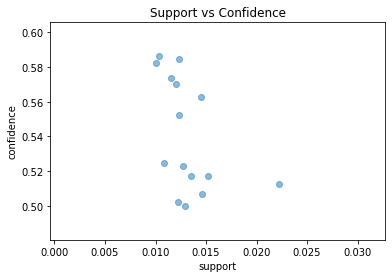

In [147]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

#### 2. Support Vs Lift

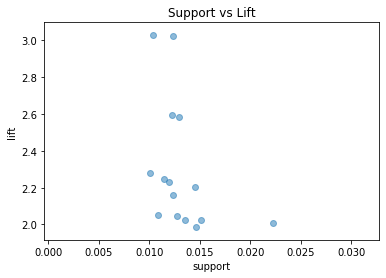

In [148]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()